In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("D:\DS_training_new\mygreatlearning_supervised\Diabetes.csv")

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.shape

(768, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
data.describe()# it makes no sense of having 0s in glucose,BP,skinthinkenss,insulin,BMI so it wil considerd as null values.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# replacing the 0's with np.nan
#from numpy import nan
data['Glucose'] = data['Glucose'].replace(0,np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0,np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0,np.nan)
data['Insulin'] = data['Insulin'].replace(0,np.nan)
data['BMI'] = data['BMI'].replace(0,np.nan)

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [16]:
print(data.isnull().sum()) # to check the null values in each column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [17]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [18]:
data.fillna(data.median(), inplace= True)

In [20]:
print(data.isnull().sum()) # to check that fillna is inputed

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='Age'>

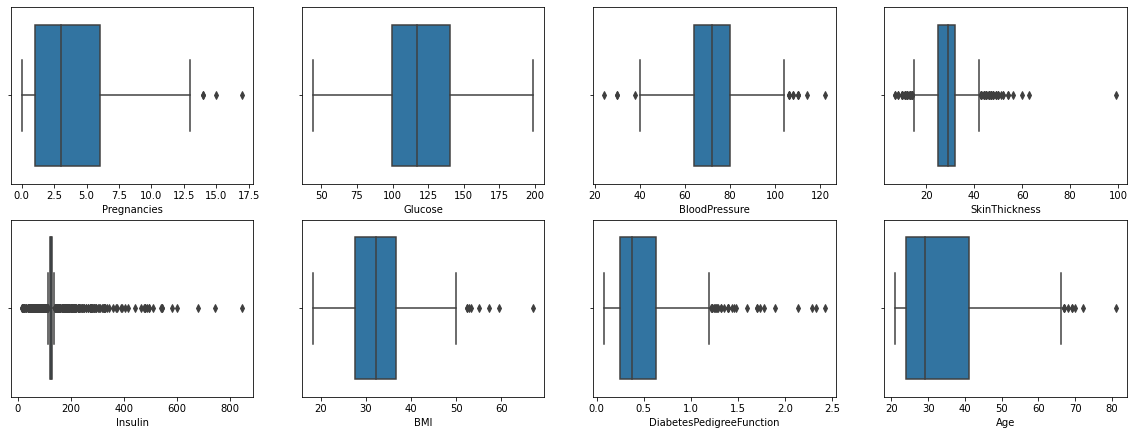

In [22]:
# Outlier detection: seaborns's boxplot is the best way to detect outliers

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])


In [23]:
#handling outliers by .clip() function

data['Pregnancies']= data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05),upper=data['Pregnancies'].quantile(0.95))
data['BloodPressure']= data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05),upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness']= data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05),upper=data['SkinThickness'].quantile(0.95))
data['Insulin']= data['Insulin'].clip(lower=data['Insulin'].quantile(0.05),upper=data['Insulin'].quantile(0.95))
data['BMI']= data['BMI'].clip(lower=data['BMI'].quantile(0.05),upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction']= data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05),upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='Age'>

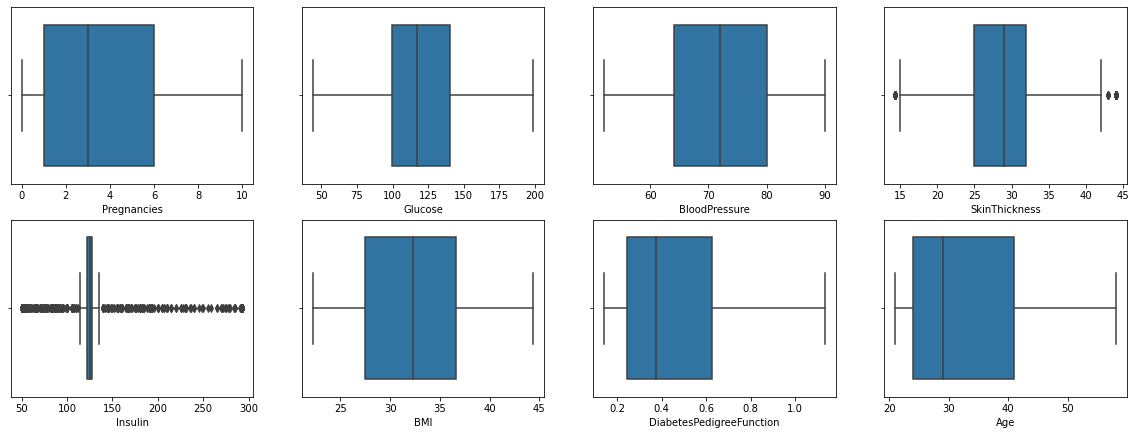

In [24]:
# let us visualies the boxplot after inputting the outliers
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

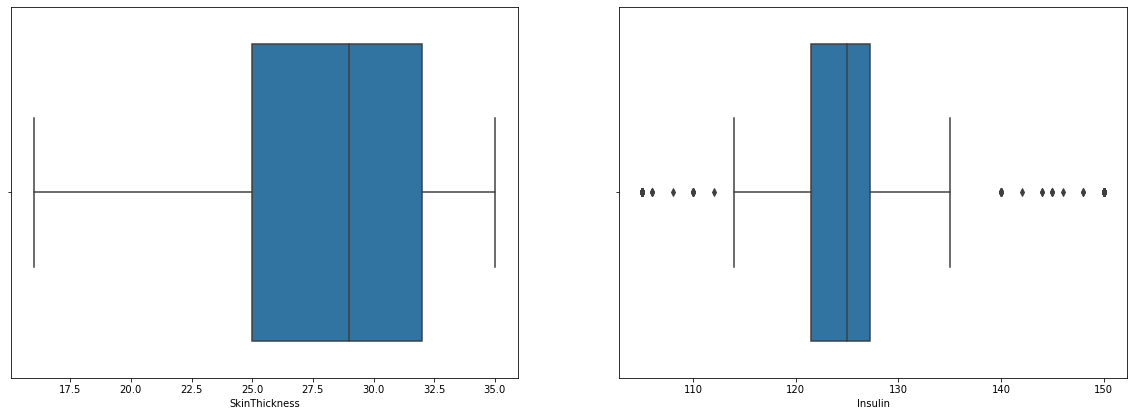

In [26]:
# still outliers in skinthickness and insuline, we can manipulate the percentile values in clip()
data['SkinThickness']= data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.07),upper=data['SkinThickness'].quantile(0.80))
data['Insulin']= data['Insulin'].clip(lower=data['Insulin'].quantile(0.21),upper=data['Insulin'].quantile(0.80))
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(data['SkinThickness'])

plt.subplot(2,2,2)
sns.boxplot(data['Insulin'])

The outliers of skinthickness is removed but the outliers of insulin are still there, which requires the major changes in percentile and may effect the prediction. So better to remove the column insulin from our dataset.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

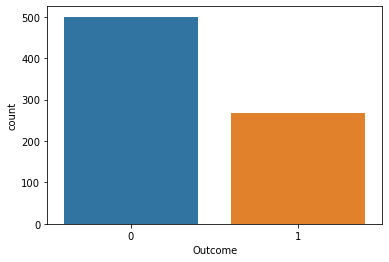

In [27]:
# visualize the distribution of diabetic and non-diabetic patients in the dataset
sns.countplot(data['Outcome']) # 1- Diabetic, 0 - NonDiabetic

In [30]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
x = data.drop(['Outcome'],axis=1)
y = data['Outcome']
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=40)

In [36]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian classifier
model = GaussianNB()
    

In [37]:
# for training

model.fit(xTrain,yTrain)

GaussianNB()

In [39]:
# For testing

predicted = model.predict(xTest)
print("Predicted value : ", predicted)

Predicted value :  [1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 1 1 1 0 0]


In [41]:
# To understand the accuracy-
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(yTest,predicted))

Accuracy:  0.7662337662337663
